# The Cancer Gene Atlas Cancer (TCGA) - Stomach Adenocarcinoma (STAD)

Author: Moshe Silverstein <br>
Date: 7-17 <br>
Data Source: https://cancergenome.nih.gov/

In [1]:
import sys, datetime, os
import numpy as np
import pandas as pd
import importlib
import my_functions as mf
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [2]:
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

In [3]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [4]:
importlib.reload(mf)

<module 'my_functions' from '/Users/moshesilverstein/Documents/Harmonizome/TCGA/my_functions.py'>

# Versions Of Modules In Use

In [5]:
%load_ext version_information
%version_information numpy, pandas, clustergrammer_widget, seaborn 

Software versions
Python 3.5.5 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 6.3.1
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.14.2
pandas 0.22.0
clustergrammer_widget 1.9.0
seaborn 0.8.1
Fri May 11 12:11:19 2018 EDT

# Functions

In [6]:
def getGenes(inputDF):
    
    inputDF.reset_index(inplace=True)
    
    inputDF.rename(columns={'index':'Gene Symbol'}, inplace=True)

    inputDF.set_index('Gene Symbol', inplace=True)

    lst = []

    for index in  inputDF.index:
        lst.append(index.split('|')[5])

    inputDF.index = lst

In [7]:
def getSampleID(inputDF, metaDF):
    
    lst = []
    
    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()

        ID = ('-').join(metaDF.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        
        ID = ID+'-'+metaDF.loc[col, 'a_AliquotBarcode'].split('-')[3][0:2]

        lst.append(ID)

        
    inputDF.columns = lst

In [8]:
def getSampleData(inputDF, metaDF, SampleTypes):
    
    lst = []

    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()
        
#         ID = ('-').join(meta.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        ID = ('-').join(col.split('-')[0:3])
        
        donor = 'Donor:'+ID
        
#         if '01' in str(col.split('-')[3]):
#             sampleType = 'Primary Solid Tumor'
#         elif '11' in str(col.split('-')[3]):
#             sampleType= 'Solid Tissue Normal'
        
        if ID in metaDF.index:
            info = (donor, 
                'Age:'+str(metaDF.loc[ID, 'age_at_initial_pathologic_diagnosis']),
                'Gender:'+str(metaDF.loc[ID, 'gender']),    
                'SampleType:'+SampleTypes[str(col.split('-')[3])],
                'Stage:'+str(metaDF.loc[ID, 'pathologic_stage']),
                'Histology:'+str(metaDF.loc[ID, 'histological_type']),
                'Tissue:'+str(metaDF.loc[ID, 'tumor_tissue_site']), 
                'Tumor:'+str(metaDF.loc[ID, 'tumor_type']),    
                'Grade'+str(metaDF.loc[ID, 'neoplasm_histologic_grade'])
#                 'SampleType:'+str(ID.split('-')[3])
               )
#             for col in metaDF.columns:
#                 if len(metaDF[col].dropna()) >= .5*len(metaDF[col]) and len(metaDF[col].unique()) > 2 and len(metaDF[col].unique()) < len(metaDF[col]) and 'age' not in col:
#                     info = info + (str(col)+':'+str(metaDF.loc[ID, col]),)
        lst.append(info)

        
    inputDF.columns = lst

In [9]:
SampleTypes ={
    '01':'Primary Solid Tumor',
    '02':'Recurrent Solid Tumor',
    '03':'Primary Blood Derived Cancer - Peripheral Blood',
    '04':'Recurrent Blood Derived Cancer - Bone Marrow',
    '05':'Additional - New Primary',
    '06':'Metastatic',
    '07':'Additional Metastatic',
    '08':'Human Tumor Original Cells',
    '09':'Primary Blood Derived Cancer - Bone Marrow',
    '10':'Blood Derived Normal',
    '11':'Solid Tissue Normal',
    '12':'Buccal Cell Normal',
    '13':'EBV Immortalized Normal',
    '14':'Bone Marrow Normal',
    '15':'sample type 15',
    '16':'sample type 16',
    '20':'Control Analyte',
    '40':'Recurrent Blood Derived Cancer - Peripheral Blood',
    '50':'Cell Lines',
    '60':'Primary Xenograft Tissue',
    '61':'Cell Line Derived Xenograft Tissue',
    '99':'sample type 99'
             }

# Path to Output Files

In [10]:
path = '/Users/moshesilverstein/Documents/Harmonizome/TCGA/Output/'

# Load Meta Data

In [11]:
meta = pd.read_csv('Input/TCGA_Metadata.csv', index_col=9)

In [12]:
meta.head()

,a_AliquotBarcode,b_disease,a_objectSizeBytes,b_uploaded,b_state,b_library_type,b_center,b_assembly,a_GCSobject
a_CGHubAnalysisID,,,,,,,,,
3a8e6a74-137f-468f-8987-fa0acdde2836,TCGA-CS-6188-01A-11R-1896-07,LGG,6354301047,8/14/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
c63d44f1-c9ad-4391-b1aa-0feb3713441b,TCGA-EO-A22Y-01A-11R-A180-07,UCEC,5497637066,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
21912089-1e42-4bcc-9ad9-fe9a9b88fb09,TCGA-94-A5I4-01A-11R-A26W-07,LUSC,4600317850,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
6b86e544-0372-434a-9f28-6fa4075dd228,TCGA-N5-A4RV-01A-21R-A28V-07,UCS,4964387768,8/30/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
30518eb4-2783-4988-bcd4-36a1a8bb4dfa,TCGA-BK-A56F-01A-32R-A27V-07,UCEC,5668623460,8/31/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...


In [13]:
meta.shape

(11373, 9)

# Load Sample MetaData

In [14]:
sample_meta = pd.read_csv('Input/metadata_Stomach adenocarcinoma [STAD]', sep='\t', index_col=1)

In [15]:
sample_meta.head()

,Unnamed: 0,Study,Project,ParticipantUUID,TSSCode,age_at_initial_pathologic_diagnosis,anatomic_neoplasm_subdivision,batch_number,bcr,clinical_M,...,BMI,age_began_smoking_in_years,h_pylori_infection,other_dx,other_malignancy_anatomic_site,other_malignancy_histological_type,other_malignancy_malignancy_type,stopped_smoking_year,venous_invasion,year_of_tobacco_smoking_onset
ParticipantBarcode,,,,,,,,,,,,,,,,,,,,,
TCGA-BR-6852,2102,STAD,TCGA,44799c67-61cd-4f3e-bdbc-423e2e0fd2e8,BR,64.0,Gastroesophageal Junction,152,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-BR-8690,2103,STAD,TCGA,337819d2-5281-4b41-9583-a476924bc837,BR,54.0,Cardia/Proximal,242,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-BR-7717,2104,STAD,TCGA,93a337ae-2bd3-4464-b38f-93dff92d3fde,BR,63.0,Cardia/Proximal,165,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-BR-A4J6,2105,STAD,TCGA,0F344863-11CC-4FAE-8386-8247DFF59DE4,BR,69.0,Cardia/Proximal,269,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-BR-A4QM,2106,STAD,TCGA,0E99C305-C69F-4FB4-84D6-29CAC1CC9D39,BR,65.0,Cardia/Proximal,269,Nationwide Children's Hospital,NaN,...,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
sample_meta.shape

(443, 70)

# Load Data

In [17]:
matrix = pd.read_csv('Input/TCGA_STAD_tpm.tsv', sep='\t', index_col=0)

In [18]:
matrix.head()

,fab45442-91d2-42a7-a50a-cd4cfba1bfa7,b803c22f-60c8-443d-8746-8b74d94e3bf8,41308a5b-08e8-4319-9ebb-32bcd8971131,430a59ba-1ba2-476c-aa3e-971895872a40,80ab46f8-df6f-4b15-a8fa-06efcc0acb8b,198e6983-db2d-4481-a952-03137da40c1f,c4b16a2d-f51f-4dbe-b6fa-28f57b454d93,c1757702-553a-48cb-a7a9-56752c238a45,8c24646f-eb47-4250-ad0d-64cedf974309,d7928bf9-517b-47c3-a2e2-f157f7cf5962,...,8b1058f6-c362-4ca0-a2fa-cf3e6663fae2,2039971a-3347-409a-bd89-9ec0b81a7dc3,76b37d2c-4460-4238-85e7-6adaecd7fe6b,7405bd56-dfc5-4800-a278-8ce48880e445,e64475c1-994e-400e-9db6-eef8ef9691bf,cd8c0da3-8db7-4f6e-98b3-1552a88eccce,79e01830-eda4-4af5-9881-dc3b2b7a3fbc,2f04894d-353b-4be8-8461-7f3ec1440e22,f31885ce-43fb-4a46-bb10-dc5e996a83bb,463e924c-57d8-4b3b-94a3-24ac7b0fafd5
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,61.41260,62.166900,83.050700,45.285500,88.559400,35.649600,63.988500,51.69110,30.32650,49.1186,...,65.24230,40.14620,92.5958,68.97930,108.794000,118.390000,58.65960,75.713700,57.04470,48.21700
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,45.82160,32.899200,43.259000,51.921000,47.600700,28.883600,33.540000,57.02210,54.19600,23.3082,...,22.63020,34.60810,13.2434,26.72810,38.179200,0.000000,20.87450,15.884500,20.15560,4.81407
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,5.89376,10.480600,8.375520,10.522700,14.687800,4.714580,9.578320,10.02520,3.67075,12.8413,...,35.63450,17.71890,22.9061,10.11390,32.986700,17.775900,16.08450,41.561500,7.63822,23.59750
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,30.75750,44.750700,43.086900,37.500800,84.014000,53.086100,32.529500,46.99630,21.87730,18.2078,...,55.21980,70.30340,15.8587,26.98870,86.931900,15.769400,23.50790,21.399000,19.05380,19.45610
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,8.89980,0.631335,0.687478,0.006799,0.062903,0.137209,0.092243,1.36189,2.03947,0.0000,...,1.96611,3.61053,0.0000,1.61448,0.600935,0.207682,0.83988,0.279179,13.14280,0.00000


In [19]:
matrix.shape

(199169, 453)

# Get Only Protein Coding Genes

In [20]:
lst = []

for i,index in enumerate(matrix.index):
    
    progressPercent = ((i+1)/len(matrix.index)*100)

    sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(matrix.index)))
    sys.stdout.flush()
                                 
    lst.append(index.split('|')[7])    
                       
matrix['Gene Type'] = lst

matrix = matrix[matrix['Gene Type'] == 'protein_coding']

matrix.drop('Gene Type', axis=1, inplace=True)

In [21]:
matrix.head()

,fab45442-91d2-42a7-a50a-cd4cfba1bfa7,b803c22f-60c8-443d-8746-8b74d94e3bf8,41308a5b-08e8-4319-9ebb-32bcd8971131,430a59ba-1ba2-476c-aa3e-971895872a40,80ab46f8-df6f-4b15-a8fa-06efcc0acb8b,198e6983-db2d-4481-a952-03137da40c1f,c4b16a2d-f51f-4dbe-b6fa-28f57b454d93,c1757702-553a-48cb-a7a9-56752c238a45,8c24646f-eb47-4250-ad0d-64cedf974309,d7928bf9-517b-47c3-a2e2-f157f7cf5962,...,8b1058f6-c362-4ca0-a2fa-cf3e6663fae2,2039971a-3347-409a-bd89-9ec0b81a7dc3,76b37d2c-4460-4238-85e7-6adaecd7fe6b,7405bd56-dfc5-4800-a278-8ce48880e445,e64475c1-994e-400e-9db6-eef8ef9691bf,cd8c0da3-8db7-4f6e-98b3-1552a88eccce,79e01830-eda4-4af5-9881-dc3b2b7a3fbc,2f04894d-353b-4be8-8461-7f3ec1440e22,f31885ce-43fb-4a46-bb10-dc5e996a83bb,463e924c-57d8-4b3b-94a3-24ac7b0fafd5
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,61.41260,62.166900,83.050700,45.285500,88.559400,35.649600,63.988500,51.69110,30.32650,49.1186,...,65.24230,40.14620,92.5958,68.97930,108.794000,118.390000,58.65960,75.713700,57.04470,48.21700
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,45.82160,32.899200,43.259000,51.921000,47.600700,28.883600,33.540000,57.02210,54.19600,23.3082,...,22.63020,34.60810,13.2434,26.72810,38.179200,0.000000,20.87450,15.884500,20.15560,4.81407
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,5.89376,10.480600,8.375520,10.522700,14.687800,4.714580,9.578320,10.02520,3.67075,12.8413,...,35.63450,17.71890,22.9061,10.11390,32.986700,17.775900,16.08450,41.561500,7.63822,23.59750
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,30.75750,44.750700,43.086900,37.500800,84.014000,53.086100,32.529500,46.99630,21.87730,18.2078,...,55.21980,70.30340,15.8587,26.98870,86.931900,15.769400,23.50790,21.399000,19.05380,19.45610
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,8.89980,0.631335,0.687478,0.006799,0.062903,0.137209,0.092243,1.36189,2.03947,0.0000,...,1.96611,3.61053,0.0000,1.61448,0.600935,0.207682,0.83988,0.279179,13.14280,0.00000


In [22]:
matrix.shape

(79930, 453)

# Map Sample Meta Data to Sample ID

In [23]:
getSampleID(matrix, meta)

In [24]:
matrix.head()

,TCGA-CG-4462-01,TCGA-CG-4306-01,TCGA-CG-4436-01,TCGA-CG-4438-01,TCGA-CG-4440-01,TCGA-CG-4442-01,TCGA-CG-4443-01,TCGA-CG-4444-01,TCGA-CG-4449-01,TCGA-BR-4366-01,...,TCGA-VQ-A91N-01,TCGA-VQ-A91Q-01,TCGA-VQ-A91U-01,TCGA-VQ-A922-01,TCGA-VQ-A924-01,TCGA-VQ-A94O-01,TCGA-VQ-A94R-01,TCGA-VQ-AA6D-01,TCGA-KB-A93G-01,TCGA-KB-A93H-01
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,61.41260,62.166900,83.050700,45.285500,88.559400,35.649600,63.988500,51.69110,30.32650,49.1186,...,65.24230,40.14620,92.5958,68.97930,108.794000,118.390000,58.65960,75.713700,57.04470,48.21700
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,45.82160,32.899200,43.259000,51.921000,47.600700,28.883600,33.540000,57.02210,54.19600,23.3082,...,22.63020,34.60810,13.2434,26.72810,38.179200,0.000000,20.87450,15.884500,20.15560,4.81407
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,5.89376,10.480600,8.375520,10.522700,14.687800,4.714580,9.578320,10.02520,3.67075,12.8413,...,35.63450,17.71890,22.9061,10.11390,32.986700,17.775900,16.08450,41.561500,7.63822,23.59750
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,30.75750,44.750700,43.086900,37.500800,84.014000,53.086100,32.529500,46.99630,21.87730,18.2078,...,55.21980,70.30340,15.8587,26.98870,86.931900,15.769400,23.50790,21.399000,19.05380,19.45610
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,8.89980,0.631335,0.687478,0.006799,0.062903,0.137209,0.092243,1.36189,2.03947,0.0000,...,1.96611,3.61053,0.0000,1.61448,0.600935,0.207682,0.83988,0.279179,13.14280,0.00000


# Map Gene Symbol to Gene ID

In [25]:
getGenes(matrix)

In [26]:
matrix.head()

,TCGA-CG-4462-01,TCGA-CG-4306-01,TCGA-CG-4436-01,TCGA-CG-4438-01,TCGA-CG-4440-01,TCGA-CG-4442-01,TCGA-CG-4443-01,TCGA-CG-4444-01,TCGA-CG-4449-01,TCGA-BR-4366-01,...,TCGA-VQ-A91N-01,TCGA-VQ-A91Q-01,TCGA-VQ-A91U-01,TCGA-VQ-A922-01,TCGA-VQ-A924-01,TCGA-VQ-A94O-01,TCGA-VQ-A94R-01,TCGA-VQ-AA6D-01,TCGA-KB-A93G-01,TCGA-KB-A93H-01
ARF5,61.41260,62.166900,83.050700,45.285500,88.559400,35.649600,63.988500,51.69110,30.32650,49.1186,...,65.24230,40.14620,92.5958,68.97930,108.794000,118.390000,58.65960,75.713700,57.04470,48.21700
M6PR,45.82160,32.899200,43.259000,51.921000,47.600700,28.883600,33.540000,57.02210,54.19600,23.3082,...,22.63020,34.60810,13.2434,26.72810,38.179200,0.000000,20.87450,15.884500,20.15560,4.81407
ESRRA,5.89376,10.480600,8.375520,10.522700,14.687800,4.714580,9.578320,10.02520,3.67075,12.8413,...,35.63450,17.71890,22.9061,10.11390,32.986700,17.775900,16.08450,41.561500,7.63822,23.59750
FKBP4,30.75750,44.750700,43.086900,37.500800,84.014000,53.086100,32.529500,46.99630,21.87730,18.2078,...,55.21980,70.30340,15.8587,26.98870,86.931900,15.769400,23.50790,21.399000,19.05380,19.45610
CYP26B1,8.89980,0.631335,0.687478,0.006799,0.062903,0.137209,0.092243,1.36189,2.03947,0.0000,...,1.96611,3.61053,0.0000,1.61448,0.600935,0.207682,0.83988,0.279179,13.14280,0.00000


# Histogram of First Sample

/Users/moshesilverstein/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


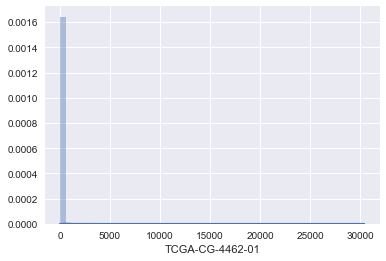

In [27]:
sns.distplot(matrix.iloc[:, 0]);

# Histogram of First Gene

/Users/moshesilverstein/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


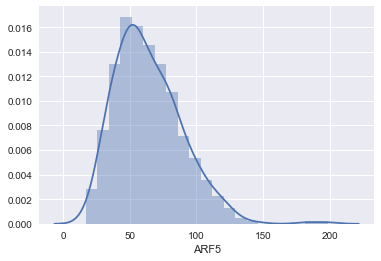

In [28]:
sns.distplot(matrix.iloc[0, :]);

# Save Unfiltered Matrix to File

In [29]:
filename = path+'tcga_stad_matrix_unfilltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
matrix.to_csv(filename, sep='\t', compression='gzip')

# Filtered

In [30]:
normalized_matrix = matrix.copy()

In [31]:
normalized_matrix = normalized_matrix.groupby(level=0).max()

# Remove any data with more than 95% missing and imput remaining missing values to matrix mean

In [32]:
normalized_matrix = mf.removeAndImpute(normalized_matrix)

In [33]:
normalized_matrix.head()

,TCGA-CG-4462-01,TCGA-CG-4306-01,TCGA-CG-4436-01,TCGA-CG-4438-01,TCGA-CG-4440-01,TCGA-CG-4442-01,TCGA-CG-4443-01,TCGA-CG-4444-01,TCGA-CG-4449-01,TCGA-BR-4366-01,...,TCGA-VQ-A91N-01,TCGA-VQ-A91Q-01,TCGA-VQ-A91U-01,TCGA-VQ-A922-01,TCGA-VQ-A924-01,TCGA-VQ-A94O-01,TCGA-VQ-A94R-01,TCGA-VQ-AA6D-01,TCGA-KB-A93G-01,TCGA-KB-A93H-01
A1BG,0.157818,0.157818,0.157818,0.157818,0.157818,0.157818,0.157818,0.157818,0.157818,0.157818,...,0.157818,0.157818,0.029017,0.157818,0.157818,0.157818,0.036784,0.157818,0.046708,0.157818
A1CF,0.187795,0.047676,2.926680,6.758640,12.812200,0.026574,0.048508,24.266700,0.008719,4.727540,...,1.198210,0.867084,3.302160,0.615751,0.066325,10.890900,0.174206,2.197760,0.315582,1.336150
A2M,965.478000,99.371900,38.110700,152.145000,64.793000,33.716200,80.308800,191.880000,330.803000,100.839000,...,129.433000,297.804000,101.479000,269.942000,90.084500,110.037000,327.393000,34.617300,537.347000,19.119500
A2ML1,0.089317,0.054930,0.049650,0.332029,0.099604,0.315074,0.292531,0.077007,13.481100,0.129527,...,0.075997,0.206093,0.054798,0.171536,0.130548,0.161235,0.127294,0.096031,0.278570,0.084956
A3GALT2,0.055266,0.099290,0.017012,0.262317,0.045627,0.277676,0.099290,0.099290,0.051052,0.118732,...,0.092736,0.281604,0.099290,0.076546,0.099290,0.099290,0.105824,0.089564,0.067156,0.172858


In [34]:
normalized_matrix.shape

(19458, 453)

# logCPM Transform

Raw counts were normalized to log10-Counts Per Million (logCPM) by dividing each column by the total sum of its counts, multiplying it by 106, followed by the application of a log10-transform.

In [35]:
samples = normalized_matrix.columns.tolist()

In [36]:
normalized_matrix.columns = np.arange(0, len(normalized_matrix.columns))

In [37]:
for col in normalized_matrix.columns:

    total = normalized_matrix[col].sum()
    
    normalized_matrix[col] = normalized_matrix[col].apply(lambda x: np.log10(((x)/total)*10**6))

In [38]:
normalized_matrix.columns = samples

In [39]:
normalized_matrix.head()

,TCGA-CG-4462-01,TCGA-CG-4306-01,TCGA-CG-4436-01,TCGA-CG-4438-01,TCGA-CG-4440-01,TCGA-CG-4442-01,TCGA-CG-4443-01,TCGA-CG-4444-01,TCGA-CG-4449-01,TCGA-BR-4366-01,...,TCGA-VQ-A91N-01,TCGA-VQ-A91Q-01,TCGA-VQ-A91U-01,TCGA-VQ-A922-01,TCGA-VQ-A924-01,TCGA-VQ-A94O-01,TCGA-VQ-A94R-01,TCGA-VQ-AA6D-01,TCGA-KB-A93G-01,TCGA-KB-A93H-01
A1BG,-0.608816,-0.583063,-0.651523,-0.583728,-0.615723,-0.633940,-0.653631,-0.578049,-0.606675,-0.606282,...,-0.574824,-0.555258,-1.264310,-0.541416,-0.609502,-0.519781,-1.219746,-0.564841,-1.087922,-0.580515
A1CF,-0.533290,-1.102921,0.616695,1.047974,1.293743,-1.407637,-1.165973,1.608804,-1.864349,0.870196,...,0.305552,0.184646,0.791835,0.049831,-0.985984,1.319125,-0.544343,0.578982,-0.258203,0.347182
A2M,3.177769,2.216043,1.731367,2.400372,1.997647,1.695741,2.052975,2.506823,2.714737,2.199189,...,2.339064,2.720515,2.279413,2.691697,2.146990,2.323600,2.729664,1.776295,2.972939,1.502804
A2ML1,-0.856037,-1.041413,-1.153765,-0.260709,-0.815603,-0.333685,-0.385616,-0.889678,1.324893,-0.692079,...,-0.892185,-0.439352,-0.988196,-0.505218,-0.691890,-0.510479,-0.680598,-0.780586,-0.312381,-0.849478
A3GALT2,-1.064515,-0.784314,-1.618930,-0.363059,-1.154664,-0.388559,-0.854882,-0.779300,-1.096821,-0.729872,...,-0.805731,-0.303776,-0.730056,-0.855649,-0.810753,-0.721032,-0.760822,-0.810867,-0.930231,-0.540983


# Normalize Matrix (Quantile Normalize the matrix for the columns)

In [40]:
normalized_matrix = mf.quantileNormalize(normalized_matrix)

In [41]:
normalized_matrix.head()

,TCGA-CG-4462-01,TCGA-CG-4306-01,TCGA-CG-4436-01,TCGA-CG-4438-01,TCGA-CG-4440-01,TCGA-CG-4442-01,TCGA-CG-4443-01,TCGA-CG-4444-01,TCGA-CG-4449-01,TCGA-BR-4366-01,...,TCGA-VQ-A91N-01,TCGA-VQ-A91Q-01,TCGA-VQ-A91U-01,TCGA-VQ-A922-01,TCGA-VQ-A924-01,TCGA-VQ-A94O-01,TCGA-VQ-A94R-01,TCGA-VQ-AA6D-01,TCGA-KB-A93G-01,TCGA-KB-A93H-01
A1BG,-0.610930,-0.469201,-0.303876,-0.631963,-0.443396,-0.483049,-0.478446,-0.526094,-0.641969,-0.641533,...,-0.534845,-0.703266,-1.271650,-0.766410,-0.512370,-0.693964,-1.194796,-0.501548,-1.143111,-0.351570
A1CF,-0.546875,-1.010062,0.794347,0.994960,1.267675,-1.279608,-1.004885,1.638106,-1.899369,0.809567,...,0.276807,-0.039021,0.769430,-0.269928,-0.895469,1.138667,-0.576674,0.520689,-0.418347,0.535329
A2M,3.246476,2.161604,1.800171,2.391446,1.934733,1.805778,2.204541,2.559638,2.691552,2.125806,...,2.262543,2.706632,2.293053,2.741207,2.053352,2.201208,2.808062,1.697477,2.958113,1.625952
A2ML1,-0.822597,-0.949577,-0.883549,-0.338295,-0.654632,-0.148335,-0.213359,-0.832548,1.242645,-0.712979,...,-0.838939,-0.613191,-0.969959,-0.739069,-0.591900,-0.683656,-0.693964,-0.720769,-0.471088,-0.659495
A3GALT2,-1.038800,-0.677071,-1.316098,-0.437724,-1.024319,-0.215543,-0.682787,-0.718388,-1.082853,-0.749830,...,-0.748954,-0.497531,-0.679529,-1.007577,-0.701991,-0.870093,-0.756188,-0.748721,-0.984314,-0.307797


# Normalize Matrix (z-score the rows)

In [42]:
mf.zscore(normalized_matrix, 'row')

In [43]:
normalized_matrix.head()

,TCGA-CG-4462-01,TCGA-CG-4306-01,TCGA-CG-4436-01,TCGA-CG-4438-01,TCGA-CG-4440-01,TCGA-CG-4442-01,TCGA-CG-4443-01,TCGA-CG-4444-01,TCGA-CG-4449-01,TCGA-BR-4366-01,...,TCGA-VQ-A91N-01,TCGA-VQ-A91Q-01,TCGA-VQ-A91U-01,TCGA-VQ-A922-01,TCGA-VQ-A924-01,TCGA-VQ-A94O-01,TCGA-VQ-A94R-01,TCGA-VQ-AA6D-01,TCGA-KB-A93G-01,TCGA-KB-A93H-01
A1BG,-0.480622,0.369212,1.360532,-0.606740,0.523943,0.286175,0.313778,0.028074,-0.666737,-0.664119,...,-0.024398,-1.034284,-4.442421,-1.412909,0.110366,-0.978505,-3.981587,0.175255,-3.671676,1.074550
A1CF,-0.670825,-1.196906,0.852518,1.080372,1.390118,-1.503053,-1.191026,1.810849,-2.206971,0.869805,...,0.264703,-0.094011,0.824217,-0.356272,-1.066754,1.243593,-0.704670,0.541701,-0.524844,0.558329
A2M,2.498510,-0.412807,-1.382734,0.203986,-1.021629,-1.367686,-0.297583,0.655340,1.009339,-0.508874,...,-0.141933,1.049806,-0.060057,1.142591,-0.703308,-0.306526,1.321999,-1.658318,1.724670,-1.850260
A2ML1,-0.419028,-0.745253,-0.575619,0.825198,0.012494,1.313224,1.146170,-0.444592,4.886803,-0.137405,...,-0.461011,0.118959,-0.797615,-0.204436,0.173658,-0.062072,-0.088554,-0.157420,0.484038,0.000000
A3GALT2,-0.850744,0.347113,-1.769010,1.139703,-0.802791,1.875451,0.328183,0.210290,-0.996626,0.106173,...,0.109074,0.941652,0.338973,-0.747350,0.264589,-0.292077,0.085118,0.109843,-0.670317,1.569952


# Merge Like Column (by taking the mean)

In [44]:
normalized_matrix = mf.merge(normalized_matrix, 'column', 'mean')

In [45]:
normalized_matrix.shape

(19458, 453)

# Map Gene Symbols To Up-to-date Approved Gene Symbols

In [46]:
mf.mapgenesymbols(normalized_matrix)

In [47]:
normalized_matrix.shape

# Merge Duplicate Genes By Rows

In [48]:
normalized_matrix = mf.merge(normalized_matrix, 'row', 'mean')

In [49]:
normalized_matrix.shape

(18917, 453)

# Histogram of First Sample

/Users/moshesilverstein/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


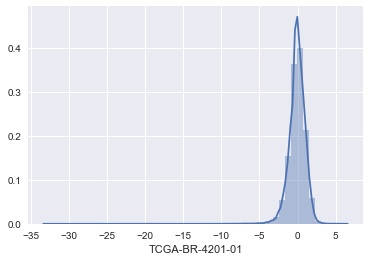

In [50]:
sns.distplot(normalized_matrix.iloc[:, 10]);

# Histogram of First Gene

/Users/moshesilverstein/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


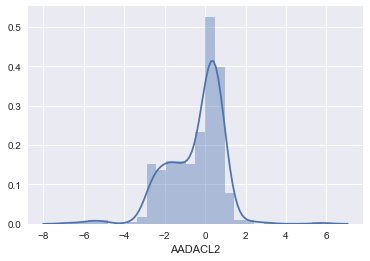

In [51]:
sns.distplot(normalized_matrix.iloc[10, :]);

# Save Filtered Matrix

In [52]:
filename = path+'tcga_stad_matrix_filltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
normalized_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene List

In [53]:
gene_list = mf.createGeneList(normalized_matrix)

In [54]:
gene_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1CF,29974
2,A2M,2
3,A2ML1,144568
4,A3GALT2,127550


In [55]:
gene_list.shape

(18917, 2)

# Save Gene List

In [56]:
filename = path+'tcga_stad_gene_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_list.to_csv(filename, sep='\t', compression='gzip')

# Create Attribute List

In [57]:
metaData = pd.DataFrame(index=normalized_matrix.columns)

for index in metaData.index:
    if ('-').join(index.split('-')[0:3]) in sample_meta.index:
        metaData.loc[index, 'Age'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'age_at_initial_pathologic_diagnosis']
        metaData.loc[index, 'Gender'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'gender']
        metaData.loc[index, 'Pathologic M'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_M']
        metaData.loc[index, 'Pathologic N'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_N']
        metaData.loc[index, 'Pathologic T'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_T']
        metaData.loc[index, 'Pathologic Stage'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_stage']
        metaData.loc[index, 'Histological Type'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'histological_type']
        metaData.loc[index, 'Sample Type'] = SampleTypes[str(index.split('-')[3])]
        metaData.loc[index, 'Tumor Tissue Site'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'tumor_tissue_site']
        metaData.loc[index, 'Neoplasm Histologic Grade'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'neoplasm_histologic_grade']
    else:
        metaData.loc[index, 'Age'] = np.nan
        metaData.loc[index, 'Gender'] = np.nan
        metaData.loc[index, 'Pathologic M'] = np.nan
        metaData.loc[index, 'Pathologic N'] = np.nan
        metaData.loc[index, 'Pathologic T'] = np.nan
        metaData.loc[index, 'Pathologic Stage'] = np.nan
        metaData.loc[index, 'Histological Type'] = np.nan
        metaData.loc[index, 'Sample Type'] = SampleTypes[str(index.split('-')[3])]
        metaData.loc[index, 'Tumor Tissue Site'] = np.nan
        metaData.loc[index, 'Neoplasm Histologic Grade'] = np.nan

In [58]:
attribute_list = mf.createAttributeList(normalized_matrix, metaData)

In [59]:
attribute_list.head()

,Age,Gender,Pathologic M,Pathologic N,Pathologic T,Pathologic Stage,Histological Type,Sample Type,Tumor Tissue Site,Neoplasm Histologic Grade
Attributes,,,,,,,,,,
TCGA-3M-AB46-01,70,MALE,MX,N0,T2b,Stage IB,"Stomach, Adenocarcinoma, Not Otherwise Specifi...",Primary Solid Tumor,Stomach,G2
TCGA-3M-AB47-01,51,MALE,MX,N2,T3,Stage IIIB,"Stomach, Adenocarcinoma, Not Otherwise Specifi...",Primary Solid Tumor,Stomach,G3
TCGA-B7-5816-01,51,FEMALE,M0,N0,T4a,Stage IIB,"Stomach, Adenocarcinoma, Diffuse Type",Primary Solid Tumor,Stomach,G3
TCGA-B7-5818-01,62,MALE,M0,N0,T2,Stage IB,"Stomach, Adenocarcinoma, Diffuse Type",Primary Solid Tumor,Stomach,G3
TCGA-B7-A5TI-01,52,MALE,M0,N3,T4,Stage IIIC,"Stomach, Adenocarcinoma, Diffuse Type",Primary Solid Tumor,Stomach,G3


In [60]:
attribute_list.shape

(453, 10)

# Save Attribute List

In [61]:
filename = path+'tcga_stad_attribute_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_list.to_csv(filename, sep='\t', compression='gzip')

# Create matrix of Standardized values (values between -1, and 1)

In [62]:
standard_matrix = mf.createStandardizedMatrix(normalized_matrix)

In [63]:
standard_matrix.head()

,TCGA-3M-AB46-01,TCGA-3M-AB47-01,TCGA-B7-5816-01,TCGA-B7-5818-01,TCGA-B7-A5TI-01,TCGA-B7-A5TJ-01,TCGA-B7-A5TK-01,TCGA-B7-A5TN-01,TCGA-BR-4187-01,TCGA-BR-4191-01,...,TCGA-VQ-AA6A-01,TCGA-VQ-AA6B-01,TCGA-VQ-AA6D-01,TCGA-VQ-AA6F-01,TCGA-VQ-AA6G-01,TCGA-VQ-AA6I-01,TCGA-VQ-AA6J-01,TCGA-VQ-AA6K-01,TCGA-ZA-A8F6-01,TCGA-ZQ-A9CR-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,-0.054901,-0.394748,0.841594,0.983053,-0.712484,-0.235872,0.073051,0.112789,-0.328550,-0.977253,...,-0.562431,0.642754,0.117235,-0.332959,-0.341783,-0.271186,-0.535961,-0.090253,-0.416811,0.417445
A1CF,-0.444249,0.328247,-0.969389,-0.991409,0.487153,0.460624,-0.364825,-0.258926,0.548987,-0.417789,...,-0.117738,0.884852,0.425319,-0.360417,0.959987,-0.779664,0.085351,0.182418,0.403245,0.036777
A2M,-0.739484,0.606881,-0.426135,-0.792433,0.271189,-0.474681,0.505258,0.249104,0.823429,0.355157,...,-0.585025,-0.165809,-0.911590,0.143204,-0.558527,-0.179024,0.174077,0.589161,0.832262,0.311039
A2ML1,0.092493,0.048356,-0.428264,0.808044,0.516359,-0.768093,-0.878413,0.710799,0.008658,0.697543,...,0.410388,-0.291482,-0.128251,-0.693060,0.322154,-0.984278,0.383925,0.467785,-0.410637,-0.498894
A3GALT2,-0.441876,0.396797,-0.781700,-0.693425,-0.172699,-0.049082,0.193638,-0.472758,-0.909678,0.957946,...,0.993282,-0.825807,0.118631,-0.035844,-0.066732,-0.040235,-0.124181,-0.772858,-0.949389,0.449785


# Plot of A Single Celltype, Normalized Value vs. Standardized Value

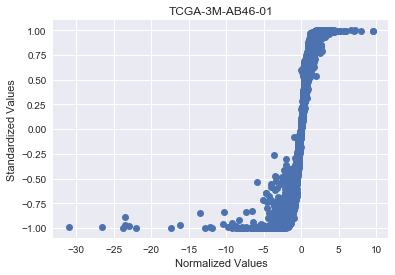

In [64]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

# Save Standardized Matrix

In [65]:
filename = path+'tcga_stad_standard_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
standard_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Tertiary Matrix

In [66]:
tertiary_matrix = mf.createTertiaryMatrix(standard_matrix)

In [67]:
tertiary_matrix.head()

,TCGA-3M-AB46-01,TCGA-3M-AB47-01,TCGA-B7-5816-01,TCGA-B7-5818-01,TCGA-B7-A5TI-01,TCGA-B7-A5TJ-01,TCGA-B7-A5TK-01,TCGA-B7-A5TN-01,TCGA-BR-4187-01,TCGA-BR-4191-01,...,TCGA-VQ-AA6A-01,TCGA-VQ-AA6B-01,TCGA-VQ-AA6D-01,TCGA-VQ-AA6F-01,TCGA-VQ-AA6G-01,TCGA-VQ-AA6I-01,TCGA-VQ-AA6J-01,TCGA-VQ-AA6K-01,TCGA-ZA-A8F6-01,TCGA-ZQ-A9CR-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,1,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,-1,-1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
A2M,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,0,0,0,0
A3GALT2,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


# Save Teriary Matrix

In [68]:
filename = path+'tcga_stad_tertiary_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
tertiary_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Up Gene Set Library

In [69]:
name = 'tcga_stad_gene_up_set'

In [70]:
mf.createUpGeneSetLib(tertiary_matrix, path, name)

# Create Down Gene Set Library

In [71]:
name = 'tcga_stad_gene_down_set'

In [72]:
mf.createDownGeneSetLib(tertiary_matrix, path, name)

# Create Up Attribute Library

In [73]:
name = 'tcga_stad_attribute_up_set'

In [74]:
mf.createUpAttributeSetLib(tertiary_matrix, path, name)

# Create Down Attribute Library

In [75]:
name = 'tcga_stad_attribute_down_set'

In [76]:
mf.createDownAttributeSetLib(tertiary_matrix, path, name)

# Create Attribute Similarity Matrix

In [77]:
attribute_normalized_matrix = normalized_matrix.copy()

In [78]:
getSampleData(attribute_normalized_matrix, sample_meta, SampleTypes)

In [79]:
attribute_similarity_matix = mf.createSimilarityMatrix(attribute_normalized_matrix.T, 'cosine')

In [80]:
attribute_similarity_matix.head()

,"(Donor:TCGA-3M-AB46, Age:70.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IB, Histology:Stomach, Adenocarcinoma, Not Otherwise Specified (NOS), Tissue:Stomach, Tumor:nan, GradeG2)","(Donor:TCGA-3M-AB47, Age:51.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIIB, Histology:Stomach, Adenocarcinoma, Not Otherwise Specified (NOS), Tissue:Stomach, Tumor:nan, GradeG3)","(Donor:TCGA-B7-5816, Age:51.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIB, Histology:Stomach, Adenocarcinoma, Diffuse Type, Tissue:Stomach, Tumor:nan, GradeG3)","(Donor:TCGA-B7-5818, Age:62.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IB, Histology:Stomach, Adenocarcinoma, Diffuse Type, Tissue:Stomach, Tumor:nan, GradeG3)","(Donor:TCGA-B7-A5TI, Age:52.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIIC, Histology:Stomach, Adenocarcinoma, Diffuse Type, Tissue:Stomach, Tumor:nan, GradeG3)","(Donor:TCGA-B7-A5TJ, Age:74.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIB, Histology:Stomach, Intestinal Adenocarcinoma, Not Otherwise Specified (NOS), Tissue:Stomach, Tumor:nan, GradeG1)","(Donor:TCGA-B7-A5TK, Age:51.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIIA, Histology:Stomach, Intestinal Adenocarcinoma, Not Otherwise Specified (NOS), Tissue:Stomach, Tumor:nan, GradeG3)","(Donor:TCGA-B7-A5TN, Age:60.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIB, Histology:Stomach, Intestinal Adenocarcinoma, Not Otherwise Specified (NOS), Tissue:Stomach, Tumor:nan, GradeG2)","(Donor:TCGA-BR-4187, Age:56.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Stomach, Adenocarcinoma, Not Otherwise Specified (NOS), Tissue:Stomach, Tumor:nan, GradeG3)","(Donor:TCGA-BR-4191, Age:72.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Stomach, Adenocarcinoma, Not Otherwise Specified (NOS), Tissue:Stomach, Tumor:nan, GradeG2)",...,"(Donor:TCGA-VQ-AA6A, Age:56.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIIC, Histology:Stomach, Intestinal Adenocarcinoma, Not Otherwise Specified (NOS), Tissue:Stomach, Tumor:nan, GradeG2)","(Donor:TCGA-VQ-AA6B, Age:48.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIIB, Histology:Stomach, Intestinal Adenocarcinoma, Not Otherwise Specified (NOS), Tissue:Stomach, Tumor:nan, GradeG2)","(Donor:TCGA-VQ-AA6D, Age:52.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIIA, Histology:Stomach, Intestinal Adenocarcinoma, Tubular Type, Tissue:Stomach, Tumor:nan, GradeG2)","(Donor:TCGA-VQ-AA6F, Age:57.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIB, Histology:Stomach, Adenocarcinoma, Not Otherwise Specified (NOS), Tissue:Stomach, Tumor:nan, GradeG2)","(Donor:TCGA-VQ-AA6G, Age:68.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIA, Histology:Stomach, Intestinal Adenocarcinoma, Not Otherwise Specified (NOS), Tissue:Stomach, Tumor:nan, GradeG2)","(Donor:TCGA-VQ-AA6I, Age:68.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIIB, Histology:Stomach, Adenocarcinoma, Not Otherwise Specified (NOS), Tissue:Stomach, Tumor:nan, GradeG3)","(Donor:TCGA-VQ-AA6J, Age:75.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIIB, Histology:Stomach, Intestinal Adenocarcinoma, Not Otherwise Specified (NOS), Tissue:Stomach, Tumor:nan, GradeG3)","(Donor:TCGA-VQ-AA6K, Age:59.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIIC, Histology:Stomach Adenocarcinoma, Signet Ring Type, Tissue:Stomach, Tumor:nan, GradeG3)","(Donor:TCGA-ZA-A8F6, Age:71.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IB, Histology:Stomach, Intestinal Adenocarcinoma, Not Otherwise Specified (NOS), Tissue:Stomach, Tumor:nan, GradeG2)","(Donor:TCGA-ZQ-A9CR, Age:79.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIIC, Histology:Stomach, Intestinal Adenocarcinoma, Tubular Type, Tissue:Stomach, Tumor:nan, GradeG3)"
,,,,,,,,,,,,,,,,,,,,,
"(Donor:TCGA-3M-AB46,

# Save Attribute Similarity Matrix

In [81]:
filename = path+'tcga_stad_attribute_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# HeatMap (clustergrammer) of Similarity Matrix

In [82]:
net.load_df(attribute_similarity_matix.iloc[:,:].copy())
# net.filter_N_top('row', rank_type='sum', N_top=300)
net.cluster()
net.widget()

clustergrammer_widget(network='{"row_nodes": [{"cat-1": "Gender:MALE", "rankvar": 242, "cat-3": "Stage:Stage I…

# Create Gene Similarity Matrix

In [83]:
gene_similarity_matix = mf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [84]:
gene_similarity_matix.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,0.047246,-0.170490,-0.121183,-0.031952,0.014718,0.108429,0.157888,0.060715,0.078327,...,0.015670,0.085336,0.108788,-0.006538,-0.200328,-0.238776,-0.219551,-0.058475,-0.066593,-0.154168
A1CF,0.047246,1.000000,-0.087251,-0.253516,0.010143,-0.269785,-0.026127,0.161908,0.119446,0.299145,...,0.149992,0.188731,-0.124931,-0.001900,-0.033555,0.055862,-0.205987,-0.158591,0.133269,-0.005519
A2M,-0.170490,-0.087251,1.000000,-0.060499,-0.119279,0.471785,-0.007992,-0.306795,-0.275386,0.020503,...,-0.422580,-0.504344,0.247389,0.075044,-0.036467,-0.114245,0.398983,0.512788,0.225949,0.070311
A2ML1,-0.121183,-0.253516,-0.060499,1.000000,-0.051837,0.127788,-0.101133,-0.161466,0.002219,-0.128082,...,0.021842,-0.098514,-0.087221,-0.016295,0.046712,0.188200,0.197290,0.080911,-0.066470,0.081243
A3GALT2,-0.031952,0.010143,-0.119279,-0.051837,1.000000,-0.053529,0.002503,0.009149,-0.019971,0.002131,...,0.105872,0.074779,-0.051114,-0.018691,0.040126,0.151174,0.026141,-0.013243,-0.076854,0.070002


# Save Gene Similarity Matrix

In [85]:
filename = path+'tcga_stad_gene_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene-Attribute Edge List

In [86]:
name = 'tcga_stad_gene_attribute_edge_list'

In [87]:
mf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, path, name)

Progeres: 100%  453 Out of 453   

 The number of statisticaly relevent gene-attribute associations is: 428467
